Nessa seção vamos apresentar, explicar e executar um código em python, utilizando o Google Colab para treinar um modelo de uma rede neural multi-camadas (multilayer perceptron). 

A ideia é receber um conjunto de dados, montar a topologia da rede, aprender a utilizar biblioteca de criação de Multilayer Perceptron, realizar o treinamento e avaliar a rede treinada

In [14]:
# Preparação de dados
# Primeiro, devemos importar as bibliotecas necessárias

# Lib de Análise de Dados Pandas:
import pandas as pd 
# Lib de computação científica: 
import numpy as np  


In [15]:
# Usando o pandas, podemos baixar o conjunto de dados de um determinado URL  
# e convertê-lo em um conjunto de dados:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
new_names = ['altura_sépala','largula_sépala','altura_pétala','largura_pétala','tipo_de_iris']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   altura_sépala   150 non-null    float64
 1   largula_sépala  150 non-null    float64
 2   altura_pétala   150 non-null    float64
 3   largura_pétala  150 non-null    float64
 4   tipo_de_iris    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
# Vamos analisar nosso conjunto de dados. Use dataset.head (n) para exibir os n dados principais. 
# Altere dataset.head (n) para dataset.sample(n) para exibir os dados:
dataset.head(150)

,altura_sépala,largula_sépala,altura_pétala,largura_pétala,tipo_de_iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
# Agora que nosso conjunto de dados está pronto, podemos separar os dados de  
# entrada (x) e a classe de saída (y). O dado de entrada será uma matriz 150x4 (150 amostras 
# com sepal_length, sepal_width, petal_length e petal_width) e a saída 150x1 (iris_class):

# A variável y (saída) será composta somente da classe de saída:
y = dataset['tipo_de_iris']
# Lembramos de remover a saída dos x's de entrada: 
x = dataset.drop(['tipo_de_iris'], axis=1)

print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)

dataset :  (150, 5)
x :  (150, 4)
y :  (150,)


In [18]:
# Agora vamos criar nossa rede neural, um Classificador Multi-Layer Perceptron (MLP).
# Precisamos codificar nosso atributo de destino para classificador baseado em Rede Neural 
# em um formato adequado. Podemos fazer isso chamando o método get_dummies (y) do Pandas. 
# Com este método converteremos a saída para valores "one hot": 
# Iris setosa: 100
# Iris versicolor: 010 
# Iris virginica: 001
# one hot encoding:
y=pd.get_dummies(y)
# Imprimindo 9 exemplos aleatoriamente, para ver os dados:
y.sample(9)

,Iris-setosa,Iris-versicolor,Iris-virginica
91,0,1,0
119,0,0,1
17,1,0,0
36,1,0,0
122,0,0,1
22,1,0,0
37,1,0,0
139,0,0,1
92,0,1,0


In [19]:
# Agora que nosso dataset está pronto, temos que separá-lo em conjunto de treinamento e teste. 
# Podemos fazer isso usando o método scikit learn train_test_split():

# Importa o train_test_split do Scikit Learn: 
from sklearn.model_selection import train_test_split

# Gerando conjunto de treino e teste (30% para teste):
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15) #0.3 data as data test

# Precisamos converter nosso conjunto de dados para float 32bits, que é o que a MLP recebe:
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

# Vamos imprimir o conjunto de dados para validação:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(127, 4) (127, 3)
(23, 4) (23, 3)


In [20]:
# Nossa rede neural será 4 x 10 x 5 x 3, portanto as camadas ocultas são (10 unidades e 5 unidades). 
# Definimos nossa iteração máxima como 5.000 para treinar na época de 5.000 e 
# alfa como 0,01 para nossa taxa de aprendizado. Definimos verbose como 1 imprimir as saídas 
# durante o processo de treinamento. Random_state é usado como uma semente aleatória:

# Importanto a lib de MLP
from sklearn.neural_network import MLPClassifier

# Initialização do modelo:
Model = MLPClassifier(hidden_layer_sizes=(3,2), max_iter=10000, alpha=0.01, #try change hidden layer
                     solver='sgd', verbose=1,  random_state=233) #try verbode=0 to train with out logging
#train our model
h=Model.fit(x_train,y_train)

#use our model to predict
y_pred=Model.predict(x_test)

Iteration 1, loss = 2.17400438
Iteration 2, loss = 2.15209951
Iteration 3, loss = 2.11765233
Iteration 4, loss = 2.06786440
Iteration 5, loss = 2.00227292
Iteration 6, loss = 1.91726640
Iteration 7, loss = 1.82425593
Iteration 8, loss = 1.73472471
Iteration 9, loss = 1.65365622
Iteration 10, loss = 1.58512256
Iteration 11, loss = 1.53032459
Iteration 12, loss = 1.48872642
Iteration 13, loss = 1.45875654
Iteration 14, loss = 1.43838272
Iteration 15, loss = 1.42540151
Iteration 16, loss = 1.41774966
Iteration 17, loss = 1.41430160
Iteration 18, loss = 1.41390656
Iteration 19, loss = 1.41612277
Iteration 20, loss = 1.41792306
Iteration 21, loss = 1.41906100
Iteration 22, loss = 1.41711084
Iteration 23, loss = 1.41180259
Iteration 24, loss = 1.40318297
Iteration 25, loss = 1.39189336
Iteration 26, loss = 1.37873598
Iteration 27, loss = 1.36478452
Iteration 28, loss = 1.35101829
Iteration 29, loss = 1.33814131
Iteration 30, loss = 1.32682478
Iteration 31, loss = 1.31675449
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [21]:
# Depois de terminar o processo de treinamento, podemos usar nosso modelo treinado 
# com o método model.predict(). Para obter o nosso resultado de classificação, podemos 
# importar classification_report de sklearn.matrix e chamar 
# classification_report( "saída correta, predição" ). Para mostrar os resultados 
# na matriz de confusão e precisão, também precisamos importá-los de sklearn.matrix:

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Imprime relatório de performance:
print(classification_report(y_test,y_pred))
# Imprime a matriz de confusão (Confusion matrix): 
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
# Imprime a taxa de acerto:  
print('accuracy is ',accuracy_score(y_pred,y_test)) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         9
           2       1.00      1.00      1.00         9

   micro avg       0.88      0.61      0.72        23
   macro avg       0.67      0.67      0.67        23
weighted avg       0.61      0.61      0.61        23
 samples avg       0.57      0.61      0.58        23

[[5 0 0]
 [9 0 0]
 [0 2 7]]
accuracy is  0.5217391304347826


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


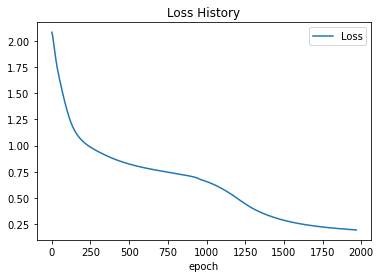

In [12]:
# Se quisermos mostrar nosso histórico de loss do modelo, 
# podemos representar graficamente a propriedade loss_curve_ de nosso modelo treinado:

import matplotlib.pyplot as plt

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])


In [13]:
# Lembrando de como codificamos nossas saídas:

# Iris setosa: 100
Iris_setosa = np.array( [[1,0,0]] )
# Iris versicolor: 010 
Iris_versicolor = np.array( [[0,1,0]] )
# Iris virginica: 001
Iris_virginica  = np.array( [[0,0,1]] )

# Agora podemos fazer previsões com o nosso modelo:
entrada_exemplo = np.array([[5.4,3.7,1.5,0.2]])

y_previsto = Model.predict(entrada_exemplo)

# Caso a saída seja Iris setosa (100):
if np.array_equal(y_previsto, Iris_setosa) == True:
  print('Iris setosa')

# Caso a saída seja Iris versicolor (010):
if np.array_equal(y_previsto, Iris_versicolor) == True:
  print('Iris versicolor')

# Caso a saída seja Iris virginica (001):
if np.array_equal(y_previsto, Iris_virginica) == True:
  print('Iris virginica')


Iris setosa
